In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from mm_env import SimpleEnv
import random

## Random Strategy

In [2]:
#env = SimpleEnv(debug=True, dp=0.2, min_dp=4, std=0.2, mu=0.01, T=1000, lambda_neg=50, lambda_pos=50, kappa=0.02)
#env = SimpleEnv(debug=True, T=86400, lambda_neg=15, lambda_pos=10, kappa=10)
env = SimpleEnv(debug=False, T=100, lambda_neg=15, lambda_pos=10, kappa=10, Q=4)

rewards = []
mid_price = []
bid_price = []
ask_price = []
volume = []
cash = []
disc_reward = 0
while env.t < env.T:
    action = env.action_space.sample()
    state, action_reward, done = env.step(np.array(action))
    disc_reward += action_reward  
    rewards.append(disc_reward)
    mid_price.append(env.mid)
    bid_price.append(env.mm_bid)
    ask_price.append(env.mm_ask)
    volume.append(state[0])
    cash.append(env.X_t)

In [3]:
env.render()

--------------------
End of t = 100
Current mid price: 98.98
Current held volume: 0
Current held value: 0.0
Current cash process: 6.03
Current value process: 6.03
--------------------



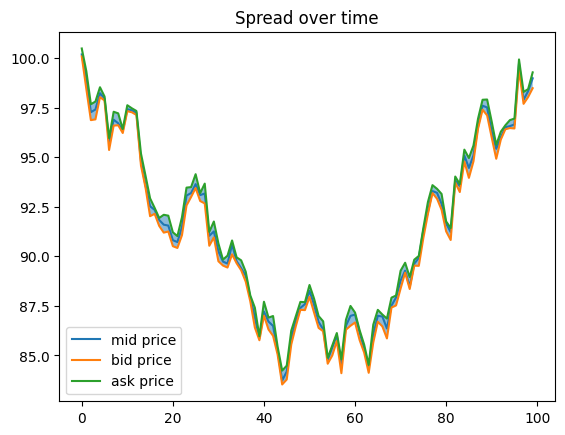

In [4]:
plt.plot(mid_price, label='mid price')
plt.fill_between(range(len(mid_price)), bid_price, ask_price, alpha=0.5)
plt.plot(bid_price, label='bid price')
plt.plot(ask_price, label='ask price')
plt.legend()
plt.title('Spread over time')
plt.show()

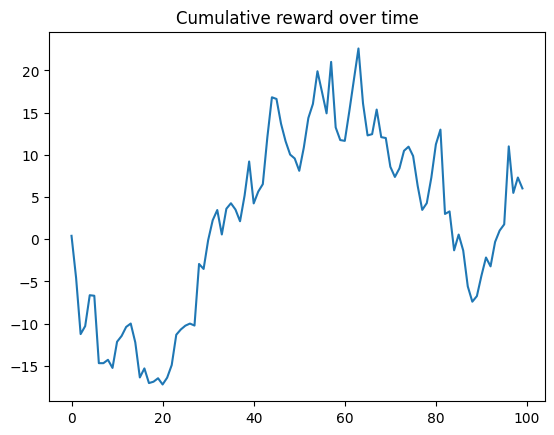

In [5]:
#plot rewards
plt.plot(rewards)
plt.title('Cumulative reward over time')
plt.show()

## Q-Learning

In [6]:
# Hyperparameters
learning_rate = 0.1
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
num_episodes = 2000
num_steps = 200

# Create the environment
env = SimpleEnv(debug=False, T=100, lambda_neg=15, lambda_pos=10, kappa=10, Q=4)

# Initialize Q-table
q_table = {(i, j): np.zeros((env.d, env.d)) for i in range(-env.Q, env.Q + 1) for j in range(env.T + 1)}

def choose_action(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()
    else:
        return np.array(np.unravel_index(np.argmax(q_table[state]), q_table[state].shape))

for episode in range(num_episodes):
    env.reset()
    state = env.state()
    done = False
    total_reward = 0

    for step in range(num_steps):
        action = choose_action(state, epsilon)
        next_state, reward, done = env.step(action)

        # Update Q-table
        #q_table[state][action] = (1 - learning_rate) * q_table[state][action] + learning_rate * (reward + gamma * (np.max(q_table[next_state])) - q_table[state][action]))
        q_table[state][action] += learning_rate * ((reward + gamma * (np.max(q_table[next_state]))) - q_table[state][action])

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay epsilon
    epsilon = max(epsilon_min, epsilon - epsilon_decay)

    # Print episode results
    if (episode + 1) % 100 == 0:
        print(f'Episode: {episode + 1}, Total Reward: {total_reward}')

Episode: 100, Total Reward: 17.373076854937707
Episode: 200, Total Reward: 0.2923217468163086
Episode: 300, Total Reward: 80.42819246878521
Episode: 400, Total Reward: 63.069711639842154
Episode: 500, Total Reward: 45.38557403748939
Episode: 600, Total Reward: 98.98958314054096
Episode: 700, Total Reward: 31.735945886023316
Episode: 800, Total Reward: 6.254820843489548
Episode: 900, Total Reward: 79.06162328187756
Episode: 1000, Total Reward: 102.80112119015098
Episode: 1100, Total Reward: 61.03408730079747
Episode: 1200, Total Reward: -1.2719634521512369
Episode: 1300, Total Reward: 40.41907849795077
Episode: 1400, Total Reward: 33.68185485026166
Episode: 1500, Total Reward: 22.580436805888638
Episode: 1600, Total Reward: 10.102046543688543
Episode: 1700, Total Reward: 26.17231318334238
Episode: 1800, Total Reward: -5.235595230829457
Episode: 1900, Total Reward: 40.71953548980442
Episode: 2000, Total Reward: 21.607627498187895


In [7]:
rewards = []
mid_price = []
bid_price = []
ask_price = []
volume = []
values = []
disc_reward = 0

env.reset()

while env.t < env.T:
    action = np.array(np.unravel_index(q_table[state].argmax(), q_table[state].shape))
    state = env.state()
    state, action_reward, done = env.step(np.array(action))

    disc_reward += action_reward
    rewards.append(disc_reward)
    mid_price.append(env.mid)
    bid_price.append(env.mm_bid)
    ask_price.append(env.mm_ask)
    volume.append(state[0])
    values.append(env.V_t)

opt_action = np.unravel_index(q_table[(0,0)].argmax(), q_table[(0,0)].shape)
Q_star = q_table[(0,0)][opt_action]

In [8]:
env.render()

--------------------
End of t = 100
Current mid price: 99.62
Current held volume: 0
Current held value: 0.0
Current cash process: 39.19
Current value process: 39.19
--------------------



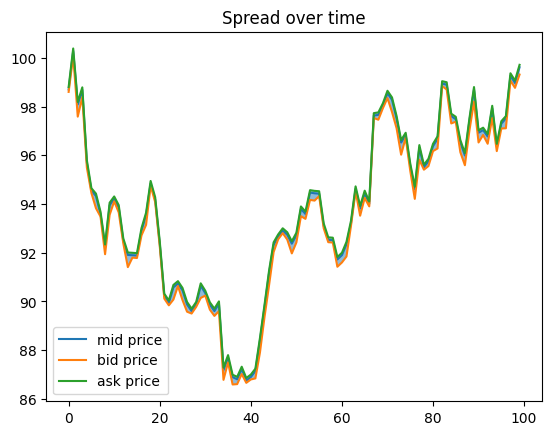

In [9]:
plt.plot(mid_price, label='mid price')
plt.fill_between(range(len(mid_price)), bid_price, ask_price, alpha=0.5)
plt.plot(bid_price, label='bid price')
plt.plot(ask_price, label='ask price')
plt.legend()
plt.title('Spread over time')
plt.show()

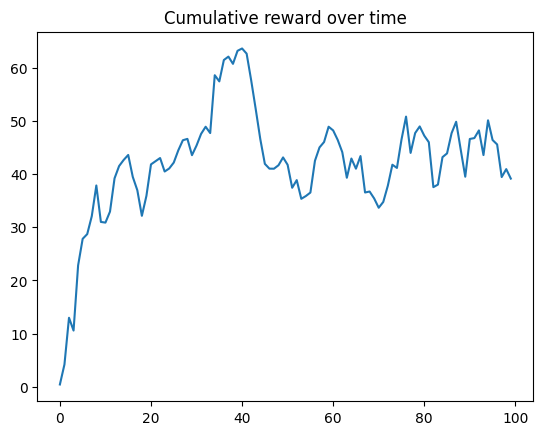

In [10]:
#plot rewards
plt.plot(rewards)
plt.title('Cumulative reward over time')
plt.show()